In [1]:
# Importing the neccessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib as mpl

from scipy import stats

import networkx as nx
import powerlaw

import collections
import random
import heapq

import math
from math import pi

C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Domonkos\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


## Functions
#### Function for getting all the coordinates of a line between two points

In [2]:
def intermediates(p1, p2, nb_points=8):
    
    x_spacing = (p2[0] - p1[0]) / (nb_points + 1)
    y_spacing = (p2[1] - p1[1]) / (nb_points + 1)

    return [[p1[0] + i * x_spacing, p1[1] +  i * y_spacing] 
            for i in range(1, nb_points+1)]

#### Function for calculating the polar coordinates from the Cartesian coordinates

In [3]:
def polar_coord(x, y):
    
    r = np.sqrt(x**2 + y**2)
    
    if y >= 0 and r != 0:
        theta = math.acos(x/r)
    elif y < 0:
        theta = -math.acos(x/r)
        
    return [r, theta]

#### Function for calculating the radial dst

In [4]:
def radial_dst(theta1, theta2):
    
    if theta1 > 0 and theta2 > 0 or theta1 < 0 and theta2 < 0:
        dst = abs(theta2 - theta1)
    elif theta1 == 0 and theta2 > 0 or theta1 == 0 and theta2 < 0 or theta1 > 0 and theta2 == 0 or theta1 < 0 and theta2 == 0:
        dst = abs(theta2 - theta1)
    elif pi/2 >= theta1 > 0 and 0 > theta2 >= -pi/2 or pi/2 >= theta2 > 0 and 0 > theta1 >= -pi/2:
        dst = abs(theta1) + abs(theta2)
    elif pi/2 > theta1 >= 0 and -pi/2 > theta2 > -pi or pi/2 > theta2 >= 0 and -pi/2 > theta1 > -pi:
        dst = abs(theta2) + abs(theta1)
    elif 0 > theta1 >= -pi/2 and pi > theta2 > pi/2 or 0 > theta2 >= -pi/2 and pi > theta1 > pi/2:
        dst = abs(theta2) + abs(theta1)
    elif pi >= theta1 > pi/2 and -pi/2 > theta2 >= -pi:
        dst = abs(pi - theta1) + abs(-pi - theta2)
    elif pi >= theta2 > pi/2 and -pi/2 > theta1 >= -pi:
        dst = abs(pi - theta2) + abs(-pi - theta1)
    elif theta1 == 0 and theta2 == 0:
        dst = 0
    
    return dst

## Generating the circle

In [5]:
# Setting the parameters of the circle

t = np.array(range(0,int(round(2*math.pi, 3)*1000)))/1000
r = 1
a = 0
b = 0

# Creating the circle circumf.

circumf_x = r * np.array([math.cos(i) for i in t]) + a
circumf_y = r * np.array([math.sin(i) for i in t]) + b

In [6]:
# Getting all the inner points of the circle

inner_coord = []

for i in range(0,len(circumf_x)):
    inner_coord += intermediates([0,0], [circumf_x[i],circumf_y[i]], 100)
    
# Transforming the inner_coord list of lists into np.array

inner_x = np.array(inner_coord).T[0]
inner_y = np.array(inner_coord).T[1]

# Appending all the x and y coordinates together

all_x_coord = list(circumf_x) + list(inner_x)
all_y_coord = list(circumf_y) + list(inner_y)

In [7]:
# Generating the polar coordinates from the Cartesian coordinates

r_values = []
theta_values = []

for i in range(0,len(all_x_coord)):
    
    temp = polar_coord(all_x_coord[i], all_y_coord[i])
    
    r_values.append(temp[0])
    theta_values.append(temp[1])

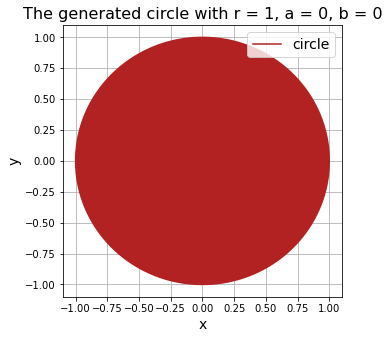

In [8]:
# Plotting the circle

plt.figure(figsize = (5,5))
plt.plot(all_x_coord, all_y_coord, color = 'firebrick', label = 'circle')

plt.title('The generated circle with r = ' + str(r) + ', a = ' + str(a) + ', b = ' + str(b), fontsize = 16)
plt.xlabel('x', fontsize = 14)
plt.ylabel('y', fontsize = 14)

plt.legend(fontsize = 14)
plt.grid()
plt.show()

# Functions

### Function for generating and adding nodes to the circle

In [48]:
def generating_circle(new_num_nodes_to_generate, all_x_coord, all_y_coord, r_values, theta_values, T):
    
    # Node list
    nodes = []    

    # Creating lists to save the generated coordinates
    generated_coordinates = []

    # Saving all the generated numbers in a list
    generated_random_nums = []
    
    # Saving the coordinates as a temp list
    temp_temp_list = []

    # Generating random numbers and placing them in the circle
    
    for i in range(0,num_nodes_to_generate_first):

        #random index
        random_index = random.randint(0,len(all_x_coord))
        generated_random_nums.append(random_index)

        #saving the generated coordinates into a dictionary
        temp = [all_x_coord[random_index], all_y_coord[random_index], r_values[random_index], theta_values[random_index]]
        temp_temp_list.append(temp)

        generated_coordinates.append((temp, (i+1), -999))
        
    # Appending the first node
    nodes.append([[all_x_coord[random_index], all_y_coord[random_index]], i+1])


    # Generating random numbers and placing them in the circle

    for i in range(0,new_num_nodes_to_generate):

        #random index
        while random_index in generated_random_nums:
            random_index = random.randint(0,len(all_x_coord))
        generated_random_nums.append(random_index)

        #getting the coordinates
        temp = [all_x_coord[random_index], all_y_coord[random_index], r_values[random_index], theta_values[random_index]]
        temp_temp_list.append(temp)
        
        #new node
        nodes.append([[all_x_coord[random_index], all_y_coord[random_index]], i + num_nodes_to_generate_first + 1])

        #measuring the distance between the new node and all the previous nodes
        for j in range(0,len(temp_temp_list)):
            
            #checking if theta > 0:
            if radial_dst(temp[3], temp_temp_list[j][3]) > 0.0001:

                #calling the radial_dst func and saving the theta values in a list
                #x_st = math.log((j+1)*(i+1)*radial_dst(temp[3], generated_coordinates[j][0][3])/2)
                x_st = temp[2] + temp_temp_list[j][2] + math.log(radial_dst(temp[3], temp_temp_list[j][3])/2)
                p_st = (1 / (1 + math.exp((x_st - r_values[i]) / T)))
                
                #if probability > p_st, node appended
                p_st_rand = random.randint(0,10000) / 10000

                if p_st_rand <= p_st:
                    #appending the new node to the generated coordinates
                    generated_coordinates.append((temp, i + num_nodes_to_generate_first + 1, j + 1))


    return [generated_coordinates, nodes, temp_temp_list]

### Function for plotting the results of the circle with nodes

In [55]:
def circle_plot(new_num_nodes_to_generate, inner_x, inner_y, circumf_x, circumf_y, generated_coordinates, nodes, drawing):

    # Plotting the circle with the generated points

    plt.figure(figsize = (10,10))

    # Plotting the circle
    plt.plot(inner_x, inner_y, color = 'gold', alpha = 0.1)
    plt.plot(circumf_x, circumf_y, color = 'orange')
        
    # Plotting the other nodes
    for i in range(0,num_nodes_to_generate_first):
        plt.plot(generated_coordinates[i][0][0], generated_coordinates[i][0][1], 'o', color = 'black', markersize = 5)    

    # Plotting the original nodes
    for i in range(1,len(nodes)):
        plt.plot(nodes[i][0][0], nodes[i][0][1], 'o', color = 'firebrick', markersize = 5)
        
    # Plotting the newly connected nodes
    for i in range(1, len(generated_coordinates)):
        plt.plot(generated_coordinates[i][0][0], generated_coordinates[i][0][1], 'o', color = 'firebrick', markersize = 5)
        plt.plot([generated_coordinates[i][0][0], generated_coordinates[generated_coordinates[i][2]-1][0][0]], [generated_coordinates[i][0][1], generated_coordinates[generated_coordinates[i][2]-1][0][1]], color = 'black', linewidth = 0.2)

    # Setting the title and labels
    plt.title('The generated circle with r = ' + str(r) + ', nodes = ' + str(new_num_nodes_to_generate+1), fontsize = 16)
    plt.xlabel('x', fontsize = 14)
    plt.ylabel('y', fontsize = 14)

    # Setting the grid
    plt.grid()

    plt.savefig('cirlce_network_T_' + str(0.2) + '.jpg', dpi = 600)

    plt.show()

### Function for generating a corresponding network

In [11]:
def network_gen(generated_coordinates, nodes):

    # Creating the graph
    circle_graph = nx.Graph()

    # Adding the nodes
    for i in nodes:
        circle_graph.add_node(i[1])

    # Adding the weights
    for i in range(1,len(generated_coordinates)):
        circle_graph.add_edge(coordinates[i][1], coordinates[i][2])
        
    # Returning the graph
    return circle_graph

### Function for plotting the network layout

In [12]:
def network_plot(graph):

    # Plotting the graph
    plt.figure(figsize = (9,9))

    # Setting the layout
    pos_cust = nx.kamada_kawai_layout(graph)

    # Drawing the graph
    nx.draw(graph, pos = pos_cust, node_color = 'firebrick', node_size=10, width = 0.5)

    #plt.savefig('network_layout_circle.jpg', dpi=400)

# Calling the functions - generating the PSO network

In [13]:
# Plotting the circle 
#mpl.rcParams['agg.path.chunksize'] = 600
#circle_plot(new_num_nodes_to_generate, inner_x, inner_y, circumf_x, circumf_y, coordinates, nodes)

# Plot for the power law distribution
#powerlaw_plotting(circle_network, 'PSO')

# Plotting the generated network
#network_plot(circle_network)

In [ ]:
# Setting some variables
num_nodes_to_generate_first = 1
new_num_nodes_to_generate = 500

# List for the clustering coeff
clust_list = []

# Defining T list
T = np.array(range(1,10))/10

# Iterating through the values
for t in T:

    # Generating the PSO
    coordinates_temp = generating_circle(new_num_nodes_to_generate, all_x_coord, all_y_coord, r_values, theta_values, t)
    coordinates = coordinates_temp[0]
    nodes = coordinates_temp[1]

    # Generating the actual network
    circle_network = network_gen(coordinates, nodes)

    # Calculating the clustering coefficient
    clust_list.append(np.mean(list(nx.clustering(circle_network).values())))
    
    print(t)

In [54]:
new_num_nodes_to_generate = 500

# Generating the PSO
coordinates_temp = generating_circle(new_num_nodes_to_generate, all_x_coord, all_y_coord, r_values, theta_values, 0.2)
coordinates = coordinates_temp[0]
nodes = coordinates_temp[1]
drawing = coordinates_temp[2]

# Generating the actual network
circle_network = network_gen(coordinates, nodes)

In [ ]:
# Plotting the circle 
#mpl.rcParams['agg.path.chunksize'] = 600
circle_plot(new_num_nodes_to_generate, inner_x, inner_y, circumf_x, circumf_y, coordinates, nodes, drawing)

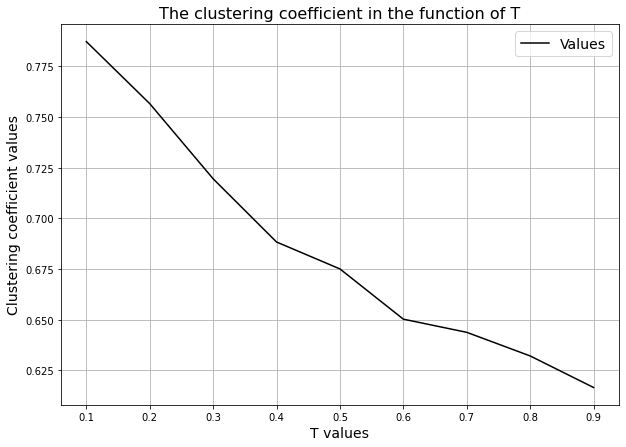

In [45]:
# Plotting the clustering coefficient in the function of T

plt.figure(figsize = (10,7))
plt.plot(T, clust_list, color = 'black', label = 'Values')

plt.title('The clustering coefficient in the function of T', fontsize = 16)
plt.xlabel('T values', fontsize = 14)
plt.ylabel('Clustering coefficient values', fontsize = 14)

plt.legend(fontsize = 14)
plt.grid()

plt.savefig('clustering_T.jpg', dpi = 400)

plt.show()